In [ ]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from skimage import io

from data_generator import *
from dice_loss import *
from unet import *

from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    img_to_array,
    load_img
)

In [2]:
TRAIN_PATH = 'data/train/'
XTRAIN_PATH = f'{TRAIN_PATH}/image'
YTRAIN_PATH = f'{TRAIN_PATH}/label'

TEST_PATH = 'data/test/'
XTEST_PATH = f'{TEST_PATH}/image'
YTEST_PATH = f'{TEST_PATH}/label'

# STEPS=2000
STEPS = 50
EPOCHS=2
# EPOCHS = 1
MODEL_NAME = 'unet_lidc.hdf5'

## Data Generation and Augmentation

In [3]:
image_generator_train = ImageDataGenerator(
    rotation_range=0,
    rescale=1./255,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

label_generator_train = ImageDataGenerator(
    rotation_range=0,
    shear_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0
)

image_generator_test = ImageDataGenerator(
    rescale=1./255,
    fill_mode='reflect',
    data_format='channels_last',
    validation_split=0.0
)

label_generator_test = ImageDataGenerator(
    # No rescale transform on target mask
    fill_mode='reflect',
    data_format='channels_last',
    validation_split=0.0
)

In [4]:
train_generator = generator(
    TRAIN_PATH,
    image_generator_train,
    label_generator_train,
    batch_sz=1,
)
test_generator = generator(
    TEST_PATH,
    image_generator_test,
    label_generator_test, 
    batch_sz=1
)

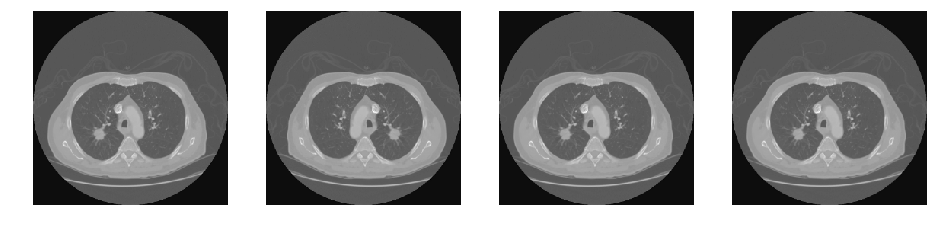

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


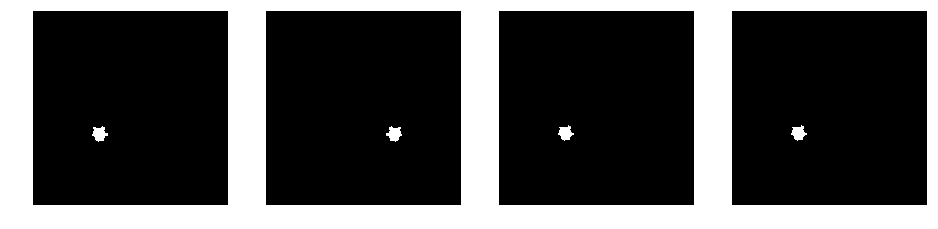

In [5]:
show_augmentation('data/train/image4/4.png', image_generator_train, n_rows=1)
show_augmentation('data/train/label4/4.png', label_generator_train, n_rows=1)

## Instantiate and Train the U-Net

In [6]:
model = unet()
model.compile(
    optimizer = Adam(lr = 1e-5),
    loss=dice_coef_loss,
    metrics = [
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives()
    ]
)
model_checkpoint = ModelCheckpoint(MODEL_NAME, monitor='loss',verbose=1, save_best_only=True)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.fit_generator(
  train_generator,
  steps_per_epoch = 300,
  epochs = 5
)

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
Found 30 images belonging to 1 classes.
300/300 [==============================] - 105s 348ms/step - loss: 0.9971 - acc: 0.1096 - precision: 0.0018 - recall: 0.9945 - true_negatives: 17077534.0000 - true_positives: 254489.0000
Epoch 2/5
300/300 [==============================] - 92s 308ms/step - loss: 0.9964 - acc: 0.5235 - precision: 0.0033 - recall: 0.9594 - true_negatives: 82188816.00

## Test the U-Net

### Training set predictions

In [10]:
# results = model.predict(X_test, 2, verbose=1)

x0 = np.array(io.imread('data/train/image0/4.png', as_gray=True))
x1 = np.array(io.imread('data/train/image1/4.png', as_gray=True))
x2 = np.array(io.imread('data/train/image2/4.png', as_gray=True))
x3 = np.array(io.imread('data/train/image3/4.png', as_gray=True))
x4 = np.array(io.imread('data/train/image4/4.png', as_gray=True))
x5 = np.array(io.imread('data/train/image5/4.png', as_gray=True))
x6 = np.array(io.imread('data/train/image6/4.png', as_gray=True))
x7 = np.array(io.imread('data/train/image7/4.png', as_gray=True))

X = np.array([x0, x1, x2, x3, x4, x5, x6, x7])

y0 = np.array(io.imread('data/train/label0/4.png', as_gray=True))
y1 = np.array(io.imread('data/train/label1/4.png', as_gray=True))
y2 = np.array(io.imread('data/train/label2/4.png', as_gray=True))
y3 = np.array(io.imread('data/train/label3/4.png', as_gray=True))
y4 = np.array(io.imread('data/train/label4/4.png', as_gray=True))
y5 = np.array(io.imread('data/train/label5/4.png', as_gray=True))
y6 = np.array(io.imread('data/train/label6/4.png', as_gray=True))
y7 = np.array(io.imread('data/train/label7/4.png', as_gray=True))

Y = np.array([y0, y1, y2, y3, y4, y5, y6, y7])

Y_hat = model.predict(X.reshape(1, 256, 256, 8, 1))

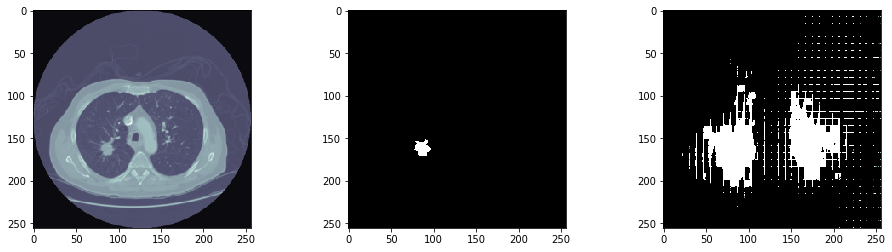

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(X[4], cmap='bone')
axs[1].imshow(Y[4], cmap='bone')
axs[2].imshow(Y_hat[0].reshape(8, 256, 256)[4], cmap='bone')
plt.show()

### Test set predictions

In [12]:
# results = model.predict(X_test, 2, verbose=1)

x0 = np.array(io.imread('data/test/image0/0.png', as_gray=True))
x1 = np.array(io.imread('data/test/image1/0.png', as_gray=True))
x2 = np.array(io.imread('data/test/image2/0.png', as_gray=True))
x3 = np.array(io.imread('data/test/image3/0.png', as_gray=True))
x4 = np.array(io.imread('data/test/image4/0.png', as_gray=True))
x5 = np.array(io.imread('data/test/image5/0.png', as_gray=True))
x6 = np.array(io.imread('data/test/image6/0.png', as_gray=True))
x7 = np.array(io.imread('data/test/image7/0.png', as_gray=True))

X = np.array([x0, x1, x2, x3, x4, x5, x6, x7])

y0 = np.array(io.imread('data/test/label0/0.png', as_gray=True))
y1 = np.array(io.imread('data/test/label1/0.png', as_gray=True))
y2 = np.array(io.imread('data/test/label2/0.png', as_gray=True))
y3 = np.array(io.imread('data/test/label3/0.png', as_gray=True))
y4 = np.array(io.imread('data/test/label4/0.png', as_gray=True))
y5 = np.array(io.imread('data/test/label5/0.png', as_gray=True))
y6 = np.array(io.imread('data/test/label6/0.png', as_gray=True))
y7 = np.array(io.imread('data/test/label7/0.png', as_gray=True))

Y = np.array([y0, y1, y2, y3, y4, y5, y6, y7])

Y_hat = model.predict(X.reshape(1, 256, 256, 8, 1))

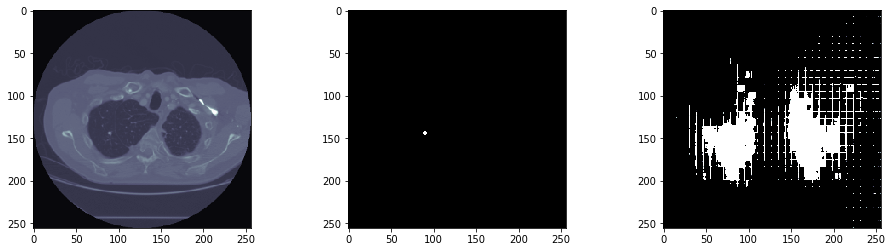

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

axs[0].imshow(X[1], cmap='bone')
axs[1].imshow(Y[1], cmap='bone')
axs[2].imshow(Y_hat[0].reshape(8, 256, 256)[1], cmap='bone')
plt.show()